In [1]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Hàm xử lý ảnh và trích xuất đặc trưng HOG

In [2]:
def load_and_preprocess_image(image_path, size=(96, 96)):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, size)
        return img
    return None

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, _ = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True
    )
    return features

Load dữ liệu và trích xuất đặc trưng

In [3]:
DATA_DIR = 'data'  # Thư mục chứa các thư mục con theo nhãn
CATEGORIES = os.listdir(DATA_DIR)
IMG_SIZE = (96, 96)

features = []
labels = []

print("Đang load dữ liệu và trích xuất đặc trưng...")
for label in CATEGORIES:
    folder_path = os.path.join(DATA_DIR, label)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        try:
            img = load_and_preprocess_image(img_path, IMG_SIZE)
            if img is not None:
                feat = extract_features(img)
                features.append(feat)
                labels.append(label)
            else:
                print(f"Không thể đọc ảnh: {img_path}")
        except Exception as e:
            print(f"Lỗi xử lý ảnh: {img_path} - {e}")

Đang load dữ liệu và trích xuất đặc trưng...


Chọn các đặc trưng và biến mục tiêu

In [4]:
X = np.array(features)
y = np.array(labels)

Chia tập train/test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Chuẩn hóa dữ liệu

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # chỉ fit trên train
X_test = scaler.transform(X_test)        # transform trên test

Huấn luyện model

In [7]:
svm_model = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=0.1)

In [8]:
y_pred = svm_model.predict(X_test)

print("Kết quả model dự đoán:")
print(classification_report(y_test, y_pred))

Kết quả model dự đoán:
              precision    recall  f1-score   support

         Bus       0.78      0.90      0.84       300
         Car       0.77      0.74      0.76       300
   Motorbike       0.85      0.91      0.88       300
       Truck       0.86      0.71      0.78       300

    accuracy                           0.81      1200
   macro avg       0.82      0.81      0.81      1200
weighted avg       0.82      0.81      0.81      1200



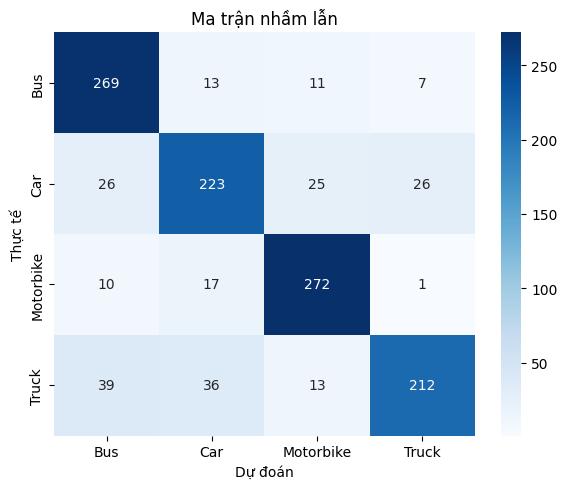

In [9]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.tight_layout()
plt.show()

Lưu model

In [ ]:
import joblib

# Lưu mô hình SVM
joblib.dump(svm_model, 'svm_model.pkl')

# Lưu bộ chuẩn hóa StandardScaler
joblib.dump(scaler, 'scaler.pkl')

print("Đã lưu mô hình SVM thành công.")

Đã lưu mô hình SVM thành công.
